#SCC - 275 CIENCIA DE DADOS
##PROFa. Roseli A F Romero
####PAE: Guilherme Nardari
#####2o. semestre de 2020

# Exercício 01
## Introdução ao Python e Bibliotecas
### Alunos:

- João Marco Oliveira Barros Nº USP: 10351992
- Leandro Giusti Mugnaini Nº USP: 10260351
- Matheus Borges Kamla Nº USP: 10277015

## Sobre os dados
 
Suponha que uma emissora de televisão te contratou para analisar o perfil dos jogadores do futebol europeu para que os narradores possam dizer estatísticas sobre eles durante os jogos.

Os dados foram enviados para você numa planilha chamada `Players.csv`, onde cada linha contém os dados de um jogador e cada coluna possui um atributo.

Utilize as bibliotecas Numpy e Pandas para resolver as questões.

In [ ]:
# Autorize o Collab a acessar seus arquivos no drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Leia a planilha 
import pandas as pd
players = pd.read_csv("/content/drive/My Drive/Colab Notebooks/players_sampled.csv")
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,176
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,150
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,179
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,159
...,...,...,...,...,...,...,...
345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,175.26,150
346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,180.34,154
347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,190.50,187
348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,177.80,165


### Questão 1:
- Transforme as datas de nascimento dos jogadores em idade e crie uma nova coluna no **DataFrame** com o novo atributo.
  - Dica: Utilize a biblioteca [time](https://docs.python.org/3/library/time.html) do Python para trabalhar com datas

- Os pesos dos jogadores foram dados em libras. Transforme os pesos dos jogadores para quilos e substitua o valor antigo da coluna no **DataFrame**.
  - Dica: 1 lb = 0.45359237 kg

- Transforme a altura dos jogadores de centímetros para metros e substitua o valor antigo da coluna no **DataFrame**.

In [ ]:
# Comece o código aqui
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born[0] - ((today.month, today.day) < (born[1], born[2]))
  
def birth_to_age(elem):
  birthday_list = []
  for i in elem[0:10].split('-'):
    birthday_list.append(int(i)) 
  age = calculate_age(birthday_list)
  return age

birthday_colum = players['birthday']
age_colum = birthday_colum.apply(lambda x: birth_to_age(x))
age_colum = age_colum.rename('age')
age_colum

0      32
1      28
2      34
3      41
4      34
       ..
345    37
346    33
347    41
348    31
349    43
Name: age, Length: 350, dtype: int64

In [ ]:
players['age'] = age_colum  #coluna idade
players['weight'] = players['weight'].apply(lambda x: x*0.45359237 )  #coluna peso em kg
players['height'] = players['height'].apply(lambda x: x/100 ) #coluna altura em metros
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,1.9304,79.832257,32
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,1.7018,68.038855,28
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,1.8288,81.193034,34
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,1.8034,69.853225,41
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,1.7526,72.121187,34
...,...,...,...,...,...,...,...,...
345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,1.7526,68.038855,37
346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,1.8034,69.853225,33
347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,1.9050,84.821773,41
348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,1.7780,74.842741,31


### Questão 2: 
Calcule a média e variância de cada atributo da base (utilize a idade, peso em kg e altura calculadas anteriormente)

In [ ]:
# Comece o código aqui
height_colum = players['height']
weight_colum = players['weight']
analise_altura = pd.DataFrame([height_colum.mean(), height_colum.var()], index=['Média altura', 'Variância altura'])
analise_peso = pd.DataFrame([weight_colum.mean(), weight_colum.var()], index=['Média peso', 'Variância peso'])
analise_idade = pd.DataFrame([age_colum.mean(), age_colum.var()], index=['Média idade', 'Variância idade'])

print(analise_altura)
print(analise_peso)
print(analise_idade)


                         0
Média altura      1.820164
Variância altura  0.003669
                        0
Média peso      76.454938
Variância peso  41.281539
                         0
Média idade      33.342857
Variância idade  26.552599


### Questão 3:
Faça um histograma dos valores de cada atributo

height


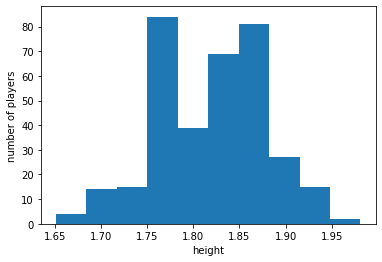

weight


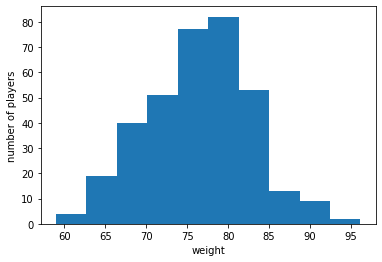

age


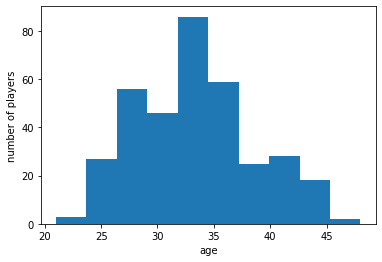

In [ ]:
import matplotlib.pyplot as plt

for column in players.columns[5:]:
  print(column)
  _ = plt.hist(players[column])
  _ = plt.ylabel('number of players')
  _ = plt.xlabel(column)

  plt.show()


### Questão 4:
Mostre o nome do jogador mais pesado e mais leve, mais novo e mais velho e o mais alto e mais baixo.

In [ ]:
# Comece o código aqui
import operator

categories = ["height", "weight", "age"]
measures = ["m", "kg", "years"]

for idx,category in enumerate(categories):
  index, value = max(enumerate(players[category]), key=operator.itemgetter(1))
  print("Max category:", category )
  print("Name:", players["player_name"][index])
  print("Value:", value, measures[idx])
  print("\n")


print("\n")
print("\n")

for idx,category in enumerate(categories):
  index, value = min(enumerate(players[category]), key=operator.itemgetter(1))
  print("Min category:", category )
  print("Name:", players["player_name"][index])
  print("Value:", value, measures[idx])
  print("\n")

Max category: height
Name: Yves Makaba-Makalamby
Value: 1.9812 m


Max category: weight
Name: Yves Makaba-Makalamby
Value: 96.16158244 kg


Max category: age
Name: Roberto Abbondanzieri
Value: 48 years






Min category: height
Name: Sebastian Giovinco
Value: 1.651 m


Min category: weight
Name: Sebastian Giovinco
Value: 58.9670081 kg


Min category: age
Name: Jonathan Leko
Value: 21 years




In [ ]:
players.to_csv('/content/drive/My Drive/Colab Notebooks/Tarefa 2 - Ciência de Dados/jogadores.csv')